# Working with Data APIs

**Adapted from: Sam Maurer // maurer@berkeley.edu // Oct. 3, 2016**

This notebook provides a demonstration of data-access APIs that operate over the web. See README.md for setup instructions.

In Part 1, we'll load and parse results from an API feed of earthquake data.  
In Part 2, we'll add query parameters to the workflow, using the Google Maps Geolocation API as an example.  
In Part 3, we'll use an authenticated API to query public Twitter posts. 

# Part 1: Reading from an automated data feed

### USGS real-time earthquake feeds

This is an API for near-real-time data about earthquakes. Data is provided in JSON format over the web. No authentication is needed, and there's no way to customize the output. Instead, the API has a separate endpoint for each permutation of the data that users might want.

**API documentation:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php

**Sample API endpoint, for magnitude 4.5+ earthquakes in past day:**  
http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_day.geojson  


In [1]:
%matplotlib inline

import pandas as pd

import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [2]:
# download data on magnitude 2.5+ quakes from the past week

endpoint_url = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson"
response = requests.get(endpoint_url)
results = response.text

# what is the data type of the results?
print(type(results))

<class 'str'>


In [3]:
# print the first 500 characters to see a sample of the data

print(results[:500])

{"type":"FeatureCollection","metadata":{"generated":1552075341000,"url":"https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/2.5_week.geojson","title":"USGS Magnitude 2.5+ Earthquakes, Past Week","status":200,"api":"1.7.0","count":296},"features":[{"type":"Feature","properties":{"mag":3,"place":"67km S of Kobuk, Alaska","time":1552071509140,"updated":1552072221905,"tz":-540,"url":"https://earthquake.usgs.gov/earthquakes/eventpage/ak0193342jvb","detail":"https://earthquake.usgs.gov/earthqua


In [4]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
data = json.loads(results)

print(type(data))

<class 'dict'>


In [5]:
# print the most recent quake

quakes = data['features']
print(quakes[0])

{'type': 'Feature', 'properties': {'mag': 3, 'place': '67km S of Kobuk, Alaska', 'time': 1552071509140, 'updated': 1552072221905, 'tz': -540, 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak0193342jvb', 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak0193342jvb.geojson', 'felt': None, 'cdi': None, 'mmi': None, 'alert': None, 'status': 'automatic', 'tsunami': 0, 'sig': 138, 'net': 'ak', 'code': '0193342jvb', 'ids': ',ak0193342jvb,', 'sources': ',ak,', 'types': ',geoserve,origin,', 'nst': None, 'dmin': None, 'rms': 0.83, 'gap': None, 'magType': 'ml', 'type': 'earthquake', 'title': 'M 3.0 - 67km S of Kobuk, Alaska'}, 'geometry': {'type': 'Point', 'coordinates': [-156.9264, 66.3022, 0]}, 'id': 'ak0193342jvb'}


In [6]:
# print it more clearly

pp.pprint(quakes[0]['geometry'])
pp.pprint(quakes[0]['properties'])

{'coordinates': [-156.9264, 66.3022, 0], 'type': 'Point'}
{'alert': None,
 'cdi': None,
 'code': '0193342jvb',
 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak0193342jvb.geojson',
 'dmin': None,
 'felt': None,
 'gap': None,
 'ids': ',ak0193342jvb,',
 'mag': 3,
 'magType': 'ml',
 'mmi': None,
 'net': 'ak',
 'nst': None,
 'place': '67km S of Kobuk, Alaska',
 'rms': 0.83,
 'sig': 138,
 'sources': ',ak,',
 'status': 'automatic',
 'time': 1552071509140,
 'title': 'M 3.0 - 67km S of Kobuk, Alaska',
 'tsunami': 0,
 'type': 'earthquake',
 'types': ',geoserve,origin,',
 'tz': -540,
 'updated': 1552072221905,
 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak0193342jvb'}


In [7]:
# pull out the title from each earthquake listing

for q in quakes:
    print(q['properties']['title'])

M 3.0 - 67km S of Kobuk, Alaska
M 2.8 - 77km SSW of Kobuk, Alaska
M 2.6 - 66km SSW of Redoubt Volcano, Alaska
M 2.8 - 71km WSW of Alberto Oviedo Mota, B.C., MX
M 3.7 - 127km S of Little Sitkin Island, Alaska
M 4.2 - 8km E of Kiska Volcano, Alaska
M 2.6 - 5km W of Mayaguez, Puerto Rico
M 6.0 - 40km N of Santa Monica, Philippines
M 5.0 - 296km ESE of L'Esperance Rock, New Zealand
M 2.7 - 97km S of Nikolski, Alaska
M 5.0 - 110km SE of L'Esperance Rock, New Zealand
M 4.1 - 27km SW of La Gomera, Guatemala
M 4.5 - 54km N of Sangiang, Indonesia
M 2.8 - 106km S of Nikolski, Alaska
M 2.9 - 62km NNE of Punta Cana, Dominican Republic
M 3.3 - 66km S of Kobuk, Alaska
M 2.8 - 67km ENE of Punta Cana, Dominican Republic
M 3.0 - 60km NE of Punta Cana, Dominican Republic
M 5.2 - 160km SSW of Abepura, Indonesia
M 3.4 - 143km NNE of Vieques, Puerto Rico
M 3.4 - 153km NNE of Vieques, Puerto Rico
M 3.1 - 68km S of Kobuk, Alaska
M 2.7 - 75km N of Arecibo, Puerto Rico
M 4.4 - 159km NE of Yelizovo, Russia
M 5.

In [8]:
# pull out magnitudes and depths into a Pandas dataframe, using
# a more compact Python syntax for iterating through lists

d = {'magnitude': [q['properties']['mag'] for q in quakes],
     'depth': [q['geometry']['coordinates'][2] for q in quakes]}

df = pd.DataFrame.from_dict(d)

# how many earthquakes were loaded into the dataframe?
print(len(df))

296


In [9]:
# print the first few lines of data

print(df.head())

   magnitude   depth
0       3.00    0.00
1       2.80    0.90
2       2.60  120.00
3       2.75    9.79
4       3.70   26.60


In [10]:
# print some descriptive statistics

print(df.describe())

        magnitude       depth
count  296.000000  296.000000
mean     3.707230   41.552297
std      1.001078   68.596524
min      2.450000   -0.450000
25%      2.800000   10.000000
50%      3.350000   14.565000
75%      4.600000   48.840000
max      6.400000  558.630000


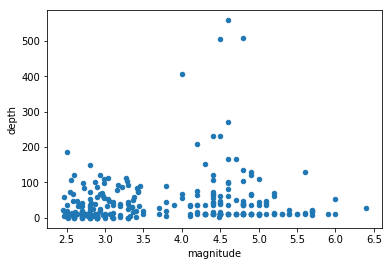

In [11]:
# plot the depth vs. magnitude

df.plot(x='magnitude', y='depth', kind='scatter')

In [12]:
# save the dataframe to disk

df.to_csv('usgs_earthquake_data.csv')

print('file saved')

file saved


In [13]:
# read it back later

new_df = pd.DataFrame.from_csv('usgs_earthquake_data.csv')

print(new_df.head())

   magnitude   depth
0       3.00    0.00
1       2.80    0.90
2       2.60  120.00
3       2.75    9.79
4       3.70   26.60


C:\Users\medav\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  This is separate from the ipykernel package so we can avoid doing imports until


# Part 2: Querying an API endpoint

### Google Maps Geocoding API

Google has lots of APIs that let you access its services through code instead of through GUI apps. This one from Google Maps lets you look up the latitude-longitude coordinates of street addresses.

It works similarly to the earthquakes example, but with query parameters added to the URL endpoint!

**API documentation:**  
https://developers.google.com/maps/documentation/geocoding/intro

**API endpoint:**  
https://maps.googleapis.com/maps/api/geocode/json

**API endpoint with query parameters:**  
https://maps.googleapis.com/maps/api/geocode/json?address=Wurster+Hall

In [14]:
import json    # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [15]:
# we have to encode the search query so that it can be passed as a URL, 
# with spaces and other special characters removed

endpoint = 'https://maps.googleapis.com/maps/api/geocode/json'

params = {'address': 'young library uky'}

url = requests.Request('GET', endpoint, params=params).prepare().url
print(url)

https://maps.googleapis.com/maps/api/geocode/json?address=young+library+uky


In [16]:
# download and parse the results

response = requests.get(url)
results = response.text
data = json.loads(results)

print(data)

{'error_message': 'You must use an API key to authenticate each request to Google Maps Platform APIs. For additional information, please refer to http://g.co/dev/maps-no-account', 'results': [], 'status': 'REQUEST_DENIED'}


In [17]:
# print it more nicely

pp.pprint(data)

{'error_message': 'You must use an API key to authenticate each request to '
                  'Google Maps Platform APIs. For additional information, '
                  'please refer to http://g.co/dev/maps-no-account',
 'results': [],
 'status': 'REQUEST_DENIED'}


In [18]:
# pull out the lat-lon coordinates

for r in data['results']:
    coords = r['geometry']['location']
    print(coords['lat'], coords['lng'])

### Exercises

1. Search for some other addresses or landmarks!
2. Take a look at the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro). What are the usage limits?

# Part 3: Querying an API with authentication

### Twitter REST APIs

Twitter's APIs also operate over the web, but they require a back-and-forth authentication process at the beginning of each connection. It's easier to have a Python library handle this than to create the query URLs ourselves.

The Twitter "REST" APIs perform stand-alone operations: you submit a query and receive results, like in earlier examples. ([REST](https://en.wikipedia.org/wiki/Representational_state_transfer) is a particular set of guidelines that many APIs follow.) Twitter also has a "streaming" API that continues sending results in real time until you disconnect.

**API documentation:**  
https://dev.twitter.com/rest/public  
https://dev.twitter.com/overview/api/tweets

**Documentation for the Python helper library**:  
https://github.com/geduldig/TwitterAPI

In [19]:
from TwitterAPI import TwitterAPI

import pprint  # library for making Python data structures readable
pp = pprint.PrettyPrinter()

In [20]:
# import API credentials from keys.py file in the
# same directory as this notebook

from keys import *

In [21]:
# set up an API connection using credentials from the keys file

api = TwitterAPI(consumer_key, consumer_secret, 
                 access_token, access_token_secret)

print("Connection is set up but not tested")

Connection is set up but not tested


### Making a simple data request

In [22]:
# most recent tweet from @UCBerkeley's timeline

endpoint = 'statuses/user_timeline'
params = {
    'screen_name': 'UKAthletics', 
    'count': 1
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'])

RT @UKBaseball: Sliding into this Friday baseball like... #WeAreUK https://t.co/rAfeXQN0en


In [23]:
# what other data is there?

pp.pprint(tweet)

{'contributors': None,
 'coordinates': None,
 'created_at': 'Fri Mar 08 19:05:24 +0000 2019',
 'entities': {'hashtags': [{'indices': [58, 66], 'text': 'WeAreUK'}],
              'media': [{'display_url': 'pic.twitter.com/rAfeXQN0en',
                         'expanded_url': 'https://twitter.com/UKBaseball/status/1104095742438895618/photo/1',
                         'id': 1104095590210772992,
                         'id_str': '1104095590210772992',
                         'indices': [67, 90],
                         'media_url': 'http://pbs.twimg.com/media/D1KJFuyWoAAAZnD.jpg',
                         'media_url_https': 'https://pbs.twimg.com/media/D1KJFuyWoAAAZnD.jpg',
                         'sizes': {'large': {'h': 800,
                                             'resize': 'fit',
                                             'w': 1200},
                                   'medium': {'h': 800,
                                              'resize': 'fit',
                        

### Other API endpoints allow different types of searches

In [24]:
# search for public tweets about #BBN

endpoint = 'search/tweets'
params = {
    'q': '#BBN', 
    'count': 5
}
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @CameronThreatt: Blessed to receive an offer from The University Of Kentucky #BBN🔵⚪️ https://t.co/lM25fLA9Cy

RT @ngapostpage: BBNaija's Nina Is All Shades Of Gorgeous In New Photos
#Celebrity #Bbn #BbnaijaNina
https://t.co/0MepLLjij4 https://t.co/M…

RT @UKFootball: #BBN this should warm you up this weekend 😼 #GetUp #WeAreUK https://t.co/2IDSXHDHkk

RT @UKFootball: CB @Lonnie30johnson has a message for the #BBN. We definitely will be watching. We are so proud of you, Lonnie! 

Tune in t…

RT @KentuckySports: “I think for most guys of my generation ... the relationship with your dad and sports is a special one. And that’s what…



In [25]:
# search for public tweets in Hindi

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'lang': 'hi', 
    'count': 5
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

RT @Mushir95770465: जबसे #राफेल की #फाइल चोरी
     हुई तबसे कोई #भक्त,,,,,,,,
         😜😜😜
    #मोदी_है_तो_मुमकिन_है,,,, 
     कहता #नजर न…

RT @govind_muwel: #AsstProfAppointment 

#RequestRahulG 
@jitupatwari 
@OfficeOfKNath 
@RahulGandhi 
@CMMadhyaPradesh 
@ugc_india 
चयनित अ…

RT @HinduBhart12: इस vedio को  जरूर देखे भारत मे हिन्दू धर्म की क्या दुर्दशा हो रही हे 
https://t.co/lduDIo1oeR

@SAfridiOfficial @Umar96Akmal Keep it up @SAfridiOfficial bhai achi English bol rahe ho ab😊

RT @SureshChavhanke: छत्तीसगढ़ में सरकार बदलते ही मियाँ सलीम की हिम्मत तो देखो.
अतिक्रमण करने वाले सडकछाप दुकानदार का दुस्साहस सिर्फ पुलिस…



In [26]:
# search for public tweets geotagged near the UK campus

endpoint = 'search/tweets'
params = {
    'q': '*', 
    'geocode': '38.034,-84.500,0.5km', 
    'count': 10
} 
r = api.request(endpoint, params)

for tweet in r.get_iterator():
    print(tweet['text'] + '\n')

Happy Almost Spring Break, at least it’s a pretty snow. https://t.co/7gh0adVzXF

@ColeBoyle3 hey lil buddy.... why ya hiding over there??? https://t.co/BwOBqgVenZ

I would like to scream

Students Make the Best Teachers! New BLOG! Students Make the Best Teachers  https://t.co/h4fau911BK

I hope Dr. Everett McCorvey sings the national anthem Saturday at Rupp Arena. He would be perfect for UK Senior Day… https://t.co/4TVMbwQBS0



### Exercises

1. Try some different search queries!
2. Display some more data fields in addition to the tweet text

### Bonus: Streaming live tweets in real time 

In [27]:
# Twitter limits simultaneous connections to the streaming API,
# so this part may not work using the demo API keys during class

endpoint = 'statuses/filter'
params = {'locations': '-180,-90,180,90'}
r = api.request(endpoint, params)
LIMIT = 20

# 'enumerate' lets us count tweets as we receive them

for i, tweet in enumerate(r.get_iterator()):
    print(tweet['created_at'])
    print(tweet['place']['full_name'] + ', ' + tweet['place']['country'])
    print(tweet['text'] + '\n')
    if (i > LIMIT): break

# close the streaming connection
r.close()

Fri Mar 08 20:04:09 +0000 2019
Queens, NY, United States
I get the privilege of knowing these two #PhenomenalWomen. I get to work with them but more importantly learn from… https://t.co/kdzbLKhCHJ

Fri Mar 08 20:04:09 +0000 2019
Sandiacre, England, United Kingdom
@philrandall @AtoShroom @BBCPolitics @wself Love to catch up.

Fri Mar 08 20:04:09 +0000 2019
Providencia, Chile, Chile
Los chilenos si hablan gracioso

Fri Mar 08 20:04:09 +0000 2019
São José dos Campos, Brasil, Brasil
Querem se safar da responsabilidade. @valenobrasil
@AndreJanonesAdv
@AndreJanones
@ONUMeioAmbiente
@DHumanosBrasil… https://t.co/ZQEOZ1vUAe

Fri Mar 08 20:04:09 +0000 2019
Los Angeles, CA, United States
Our Beyond group is too wild 😂

Fri Mar 08 20:04:09 +0000 2019
Mubarak Al Kabeer, Kuwait, Kuwait
I'm at ديوان Al happy الكرام 💜 in Mubarak Al-kabeer https://t.co/1OKPB0Gsu7

Fri Mar 08 20:04:09 +0000 2019
Bremen, Deutschland, Deutschland
35' Werder rückt sehr weit auf und bietet den Gästen somit natürlich gute M

### Exercises for the remainder of class

1. Make a scatter plot of the lat-lon coordinates of earthquakes.  
   &nbsp;
   
2. Using the geocoding example as a starting point, try searching the Google Maps Directions API or Elevation API instead. Descriptions are in the [API documentation](https://developers.google.com/maps/documentation/geocoding/intro).  
   &nbsp;
   

In [28]:
pp.pprint(quakes)

[{'geometry': {'coordinates': [-156.9264, 66.3022, 0], 'type': 'Point'},
  'id': 'ak0193342jvb',
  'properties': {'alert': None,
                 'cdi': None,
                 'code': '0193342jvb',
                 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak0193342jvb.geojson',
                 'dmin': None,
                 'felt': None,
                 'gap': None,
                 'ids': ',ak0193342jvb,',
                 'mag': 3,
                 'magType': 'ml',
                 'mmi': None,
                 'net': 'ak',
                 'nst': None,
                 'place': '67km S of Kobuk, Alaska',
                 'rms': 0.83,
                 'sig': 138,
                 'sources': ',ak,',
                 'status': 'automatic',
                 'time': 1552071509140,
                 'title': 'M 3.0 - 67km S of Kobuk, Alaska',
                 'tsunami': 0,
                 'type': 'earthquake',
                 'types': ',geoserve,origin,',
   

 {'geometry': {'coordinates': [99.388, 23.9766, 10], 'type': 'Point'},
  'id': 'us1000jc0h',
  'properties': {'alert': None,
                 'cdi': None,
                 'code': '1000jc0h',
                 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jc0h.geojson',
                 'dmin': 2.684,
                 'felt': None,
                 'gap': 108,
                 'ids': ',us1000jc0h,',
                 'mag': 4.4,
                 'magType': 'mb',
                 'mmi': None,
                 'net': 'us',
                 'nst': None,
                 'place': '15km ESE of Dedang, China',
                 'rms': 0.85,
                 'sig': 298,
                 'sources': ',us,',
                 'status': 'reviewed',
                 'time': 1551987442310,
                 'title': 'M 4.4 - 15km ESE of Dedang, China',
                 'tsunami': 0,
                 'type': 'earthquake',
                 'types': ',geoserve,origin,phase-data,

  'id': 'us1000jbw4',
  'properties': {'alert': None,
                 'cdi': 2,
                 'code': '1000jbw4',
                 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jbw4.geojson',
                 'dmin': 0.257,
                 'felt': 30,
                 'gap': 173,
                 'ids': ',nm60077123,us1000jbw4,',
                 'mag': 2.7,
                 'magType': 'mb_lg',
                 'mmi': None,
                 'net': 'us',
                 'nst': None,
                 'place': '7km ESE of Century, Florida',
                 'rms': 0.7,
                 'sig': 118,
                 'sources': ',nm,us,',
                 'status': 'reviewed',
                 'time': 1551933951840,
                 'title': 'M 2.7 - 7km ESE of Century, Florida',
                 'tsunami': 0,
                 'type': 'earthquake',
                 'types': ',dyfi,geoserve,origin,phase-data,',
                 'tz': -360,
                 'u

                 'types': ',geoserve,origin,phase-data,',
                 'tz': 540,
                 'updated': 1551926776132,
                 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/us1000jbb2'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-96.1188, 34.6648, 5], 'type': 'Point'},
  'id': 'us1000jb99',
  'properties': {'alert': None,
                 'cdi': 2,
                 'code': '1000jb99',
                 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jb99.geojson',
                 'dmin': 0.727,
                 'felt': 3,
                 'gap': 70,
                 'ids': ',us1000jb99,',
                 'mag': 2.6,
                 'magType': 'mb_lg',
                 'mmi': None,
                 'net': 'us',
                 'nst': None,
                 'place': '16km NNE of Coalgate, Oklahoma',
                 'rms': 0.44,
                 'sig': 105,
                 'sources': ',us,',
                 'status'

                 'sig': 135,
                 'sources': ',pr,',
                 'status': 'reviewed',
                 'time': 1551828867340,
                 'title': 'M 3.0 - 14km NE of Miches, Dominican Republic',
                 'tsunami': 0,
                 'type': 'earthquake',
                 'types': ',geoserve,origin,phase-data,',
                 'tz': -240,
                 'updated': 1551853287437,
                 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2019064015'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-75.4449, -9.8302, 10], 'type': 'Point'},
  'id': 'us1000jb1e',
  'properties': {'alert': None,
                 'cdi': 2,
                 'code': '1000jb1e',
                 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000jb1e.geojson',
                 'dmin': 2.545,
                 'felt': 3,
                 'gap': 113,
                 'ids': ',us1000jb1e,',
                 'mag': 4.8,
             

                 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak0192xwwct7.geojson',
                 'dmin': None,
                 'felt': None,
                 'gap': None,
                 'ids': ',ak0192xwwct7,',
                 'mag': 2.6,
                 'magType': 'ml',
                 'mmi': None,
                 'net': 'ak',
                 'nst': None,
                 'place': '89km S of Kodiak Station, Alaska',
                 'rms': 0.77,
                 'sig': 104,
                 'sources': ',ak,',
                 'status': 'automatic',
                 'time': 1551759657879,
                 'title': 'M 2.6 - 89km S of Kodiak Station, Alaska',
                 'tsunami': 0,
                 'type': 'earthquake',
                 'types': ',geoserve,origin,',
                 'tz': -540,
                 'updated': 1551759931637,
                 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/ak0192xwwct7'},
  'type': 'Feature

                 'status': 'reviewed',
                 'time': 1551654925100,
                 'title': 'M 2.9 - 58km NNW of Road Town, British Virgin '
                          'Islands',
                 'tsunami': 0,
                 'type': 'earthquake',
                 'types': ',geoserve,origin,phase-data,',
                 'tz': -240,
                 'updated': 1551679751670,
                 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/pr2019062008'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-144.2817, 63.1608, 5], 'type': 'Point'},
  'id': 'ak0192ux1k4l',
  'properties': {'alert': None,
                 'cdi': None,
                 'code': '0192ux1k4l',
                 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/ak0192ux1k4l.geojson',
                 'dmin': None,
                 'felt': None,
                 'gap': None,
                 'ids': ',ak0192ux1k4l,us1000ja7x,',
                 'mag': 2.8,
                

                 'cdi': None,
                 'code': '1000ja1g',
                 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000ja1g.geojson',
                 'dmin': 6.402,
                 'felt': None,
                 'gap': 114,
                 'ids': ',us1000ja1g,',
                 'mag': 4.5,
                 'magType': 'mb',
                 'mmi': None,
                 'net': 'us',
                 'nst': None,
                 'place': '24km E of Pamandzi, Mayotte',
                 'rms': 0.84,
                 'sig': 312,
                 'sources': ',us,',
                 'status': 'reviewed',
                 'time': 1551582033600,
                 'title': 'M 4.5 - 24km E of Pamandzi, Mayotte',
                 'tsunami': 0,
                 'type': 'earthquake',
                 'types': ',geoserve,origin,phase-data,',
                 'tz': 180,
                 'updated': 1551583583040,
                 'url': 'https://earthquake.usg

                 'tz': -480,
                 'updated': 1551845464073,
                 'url': 'https://earthquake.usgs.gov/earthquakes/eventpage/nc73147171'},
  'type': 'Feature'},
 {'geometry': {'coordinates': [-163.469, 53.3241, 34.91], 'type': 'Point'},
  'id': 'us1000j9zk',
  'properties': {'alert': None,
                 'cdi': None,
                 'code': '1000j9zk',
                 'detail': 'https://earthquake.usgs.gov/earthquakes/feed/v1.0/detail/us1000j9zk.geojson',
                 'dmin': 1.326,
                 'felt': None,
                 'gap': 206,
                 'ids': ',ak0192t0ufaf,us1000j9zk,',
                 'mag': 3.1,
                 'magType': 'ml',
                 'mmi': None,
                 'net': 'us',
                 'nst': None,
                 'place': '169km S of False Pass, Alaska',
                 'rms': 0.74,
                 'sig': 148,
                 'sources': ',ak,us,',
                 'status': 'reviewed',
                 'ti

In [31]:
d = {'lattitude': [q['geometry']['coordinates'][1] for q in quakes],'longitude': [q['geometry']['coordinates'][0] for q in quakes]}

df = pd.DataFrame.from_dict(d)


In [32]:
print(len(df))
df.head()

296


,lattitude,longitude
0,66.302200,-156.9264
1,66.246300,-157.4429
2,59.931000,-153.1752
3,31.902833,-115.8145
4,50.805800,178.5220


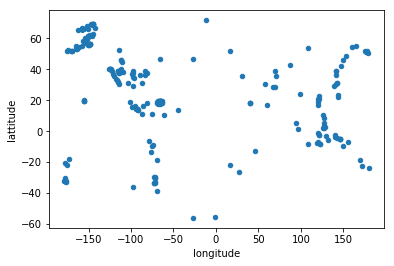

In [33]:
df.plot(x = 'longitude', y = 'lattitude', kind='scatter')

### For next time...

In the next class, you will try out another API that provides data you're interested in. You will be asked to try connecting to it using Python code, and performing some basic operations on the data.  To come prepared for next time, please explore some of the transportation-related APIs that may be valuable, and choose one that is of interest to you.

Here are a a few to get you started. 

Public Transit
https://www.programmableweb.com/news/how-smart-cities-are-using-apis-public-transport-apis/2014/05/22

Long-Distance Travel
http://www.olery.com/blog/the-best-travel-apis-discover-contribute/ 

Transportation
https://www.programmableweb.com/category/transportation/api


Start by reading the public transit page, because that provides a nice overview of the types of applications out there, and some of the issues in using them.  These lessons often apply to traffic and transportation more generally.  

Keep in mind that there are a number of different organizations that provide APIs, with different motivations and quality of what is provided.  If it is a private company, what is their business model?  What is the underlying source of the data, and what might that imply about how representative it is of the real world?  There is a ton of stuff out there.  How do we go about sorting out what is useful to us and what is now.  Spend some time exploring these and thinking about these questions.  
